# PPXF vs our observation operator: are they different?

Do a data simulation using our operator, then fit with PPXF:

In [1]:
cd ../

/Users/pjethwa/Astro/Science/uq4pk


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import uq4pk_src
from uq4pk_src.observation_operator import ObservationOperator
from ppxf import ppxf

In [3]:
ssps = uq4pk_src.model_grids.MilesSSP(
    miles_mod_directory='EMILES_BASTI_BASE_BI_FITS',
    imf_string='Ebi1.30',
    lmd_min=6000,
    lmd_max=7000,
    )

In [4]:
G = ObservationOperator(ssps=ssps,
                        dv=10.,
                        do_log_resample=True,
                        max_order_hermite=6)

Distribution functions should have shape (12, 53)


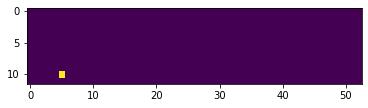

In [5]:
f_true = np.zeros((12,53))
f_true[10,5] = 1
plt.imshow(f_true)

In [6]:
theta_v_true = [100, 40, 1., 0., 0., 0.2, 0.2, 0.1, 0.3]

In [7]:
ybar = G.evaluate(f_true, theta_v_true)

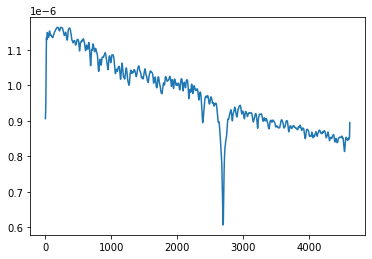

In [8]:
plt.plot(ybar)

In [9]:
mask = np.ones_like(ybar, dtype=bool)
mask[:50] = False
mask[-50:] = False

In [11]:
templates = ssps.Xw
galaxy = ybar
noise = np.ones_like(ybar)*1e-30
velscale = ssps.dv
start = [0., 30., 0., 0., 0., 0.]
bounds = [[-500,500], [3,300.], [-0.3,0.3], [-0.3,0.3], [-0.3,0.3], [-0.3,0.3]]
moments = 6
mask = mask

ppxf_fit = ppxf.ppxf(
    templates, 
    galaxy, 
    noise, 
    velscale,
    start=start,
    degree=-1,
    mdegree=-1,
    moments=moments,
    bounds=bounds,
    regul=0,
    mask=mask,
    bias=0       # ppxf bias for regularisation
)

 Best Fit:       Vel     sigma        h3        h4        h5        h6
 comp.  0:       100        40    -0.200     0.200    -0.100     0.300
chi2/DOF: 3.238e+32; degree = -1; mdegree = 0
method = capfit; Jac calls: 10; Func calls: 72; Status: 3
linear_method = lsq_box; Nonzero Templates (>0.1%):  1 / 636


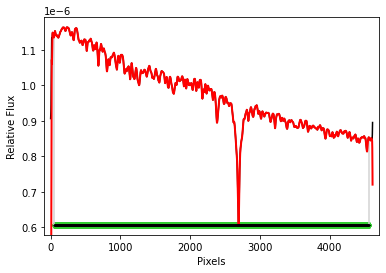

In [12]:
ppxf_fit.plot()

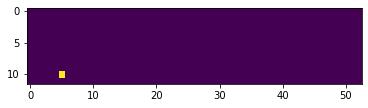

In [13]:
img = np.reshape(ppxf_fit.weights, ssps.par_dims)
plt.imshow(img)

The recovered distribtuion functions are the same! But there is a sign difference in the odd gauss hermite moments:

In [14]:
print(theta_v_true)

[100, 40, 1.0, 0.0, 0.0, 0.2, 0.2, 0.1, 0.3]


In [17]:
ppxf_fit.sol

array([99.99982699, 39.99986119, -0.19999301,  0.20000129, -0.10000587,
        0.3       ])

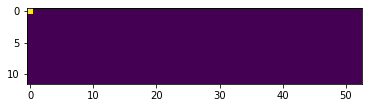

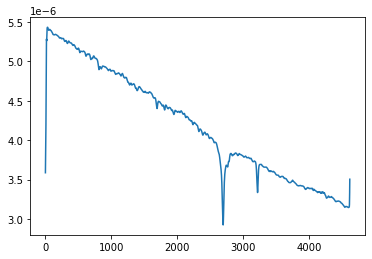

In [20]:
f_true = np.zeros((12,53))
f_true[0,0] = 1
plt.imshow(f_true)
plt.show()

ybar = G.evaluate(f_true, theta_v_true)
plt.plot(ybar)
plt.show()

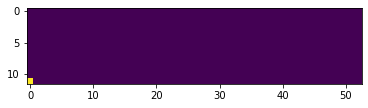

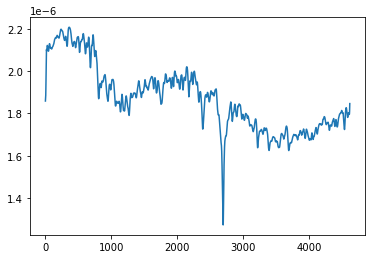

In [22]:
f_true = np.zeros((12,53))
f_true[-1,0] = 1
plt.imshow(f_true)
plt.show()

ybar = G.evaluate(f_true, theta_v_true)
plt.plot(ybar)
plt.show()